> A basic introduction to vector zonal stats 

[![](https://colab.research.google.com/assets/colab-badge.svg "Open in Colab button")](https://colab.research.google.com/github/thinkingmachines/geowrangler/blob/master/notebooks/tutorial.vector_zonal_stats.ipynb)

In [ ]:
#| include: false
# all_slow

In [ ]:
#| include: false
#| no_test
! [ -e /content ] && pip install -Uqq geowrangler

In [ ]:
#| include: false
#| no_test
!mkdir -p ../data
![ -e /content ] && ln -s ../data .

In [ ]:
#| include: false
#| no_test
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Basic Usage

Generate zonal stats for a GeoDataframe containing areas of interest

Terms:

* **aoi** - (area of interest) a geodataframe which we are interested in generating zonal statistics for
* **data** - the source geodataframe containing the features which are interested in collecting zonal stats for our aoi.


### Use case 1 - Count POIs (Points of Interest) 

#### Example 1: Count POIs for Regions

* Input:
  - aoi - region3,4,ncr regions (Admin Level 1) (Central Luzon) geometry (geom_type - polygon, multipolygon
  - data - Philippine pois (geom_type - points)
  - overlap_method = 'intersects'
  - aggregations:
    * count - number of pois within aoi
* Output
  - aoi with pois count (default output column: `index_count`)

In [ ]:
#| include: false
import warnings

In [ ]:
#| include: false
warnings.filterwarnings(action="ignore", category=UserWarning, module="geopandas")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geowrangler.vector_zonal_stats as vzs

In [ ]:
#| include: false
#| no_test
!mkdir -p ../data
# download sample geojson files from repo
![ ! -e ../data/region34ncr_admin.geojson ] && curl -s -o ../data/region34ncr_admin.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region34ncr_admin.geojson
![ ! -e ../data/region34ncr_osm_pois.geojson ] && curl -s -o ../data/region34ncr_osm_pois.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region34ncr_osm_pois.geojson
![ ! -e ../data/region3_admin_grids.geojson ] && curl -s -o ../data/region3_admin_grids.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region3_admin_grids.geojson
![ ! -e ../data/region3_osm_pois.geojson ] && curl -s -o ../data/region3_osm_pois.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region3_osm_pois.geojson
![ ! -e ../data/region34ncr_population_land.geojson ] && curl -s -o ../data/region34ncr_population_land.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region34ncr_population_land.geojson
![ ! -e ../data/region3_population_pois.geojson ] && curl -s -o ../data/region3_population_pois.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region3_population_pois.geojson
![ ! -e ../data/region3_bingtile_grid13.geojson ] && curl -s -o ../data/region3_bingtile_grid13.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region3_bingtile_grid13.geojson

In [ ]:
%%time
# area multipolygons for regions 3,4,ncr of the philippines
aoi = gpd.read_file("../data/region34ncr_admin.geojson")

CPU times: user 1.43 s, sys: 115 ms, total: 1.55 s
Wall time: 1.6 s


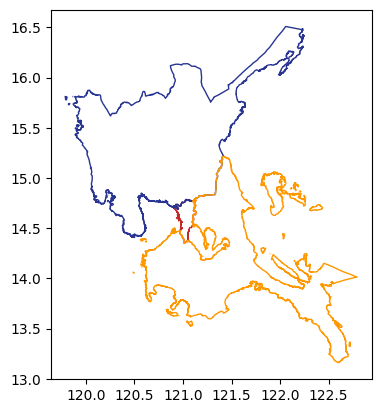

In [ ]:
#| no_test
ax = aoi.plot(
    ax=plt.axes(),
    facecolor="none",
    edgecolor=[
        "#C62828",
        "#283593",
        "#FF9800",
    ],
)

In [ ]:
#| no_test
aoi

,Reg_Code,Reg_Name,Reg_Alt_Name,geometry
0,130000000,National Capital Region,NCR,"MULTIPOLYGON (((121.03842 14.78525, 121.03815 ..."
1,030000000,Region III,Central Luzon,"MULTIPOLYGON (((120.11687 14.76309, 120.11684 ..."
2,040000000,Region IV-A,Calabarzon,"MULTIPOLYGON (((122.72165 13.36485, 122.72143 ..."


In [ ]:
%%time
# raw pois from osm data (subset of region3,4, ncr only)
raw_data = gpd.read_file("../data/region34ncr_osm_pois.geojson")

CPU times: user 30 ms, sys: 1.71 ms, total: 31.7 ms
Wall time: 32.9 ms


In [ ]:
#| no_test
raw_data.columns.values

array(['osm_id', 'code', 'fclass', 'name', 'BARANGAY_CODE', 'geometry'],
      dtype=object)

In [ ]:
#| no_test
raw_data.head()

,osm_id,code,fclass,name,BARANGAY_CODE,geometry
0,311568428,2701,tourist_info,Manila American Cemetery and Memorial Visitor ...,137602022,POINT (121.04852 14.54398)
1,672565496,2701,tourist_info,ecopark paging and first aid station,137404141,POINT (121.07479 14.71173)
2,672565498,2701,tourist_info,Ecopark ticket counter,137404141,POINT (121.07326 14.71291)
3,1585389544,2701,tourist_info,Area Formerly Occupied by Fort Bonifacio Museum,137602021,POINT (121.05837 14.55071)
4,1834855424,2701,tourist_info,Lotto Booth,137601020,POINT (120.99216 14.42312)


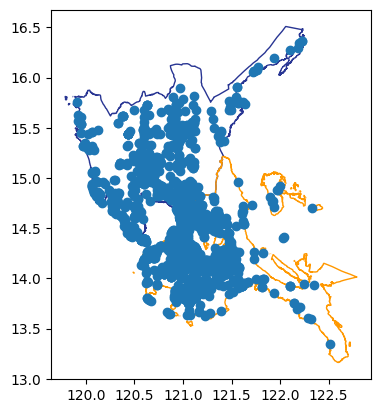

In [ ]:
#| no_test
ax = aoi.plot(
    ax=plt.axes(),
    facecolor="none",
    edgecolor=[
        "#C62828",
        "#283593",
        "#FF9800",
    ],
)
ax = raw_data.plot(ax=ax)

Compute POIs count per region

In [ ]:
%%time
aoi = vzs.create_zonal_stats(
    aoi,
    raw_data,
    overlap_method="intersects",
    aggregations=[{"func": "count"}],
)

CPU times: user 51.1 ms, sys: 7.01 ms, total: 58.1 ms
Wall time: 58 ms


New aoi with pois count in the column `index_count`. (The column name can be overridden as shown in the next example)

In [ ]:
%%time
#| no_test
aoi

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.15 µs


,Reg_Code,Reg_Name,Reg_Alt_Name,geometry,index_count
0,130000000,National Capital Region,NCR,"MULTIPOLYGON (((121.03842 14.78525, 121.03815 ...",880
1,030000000,Region III,Central Luzon,"MULTIPOLYGON (((120.11687 14.76309, 120.11684 ...",701
2,040000000,Region IV-A,Calabarzon,"MULTIPOLYGON (((122.72165 13.36485, 122.72143 ...",1253


In [ ]:
#| include: false
# drop newly created zonal stat
aoi = aoi.drop(labels=["index_count"], axis=1)

#### Example 2: Count attractions for Regions 

* Input: 
  - aoi - region3,4,ncr regions (Admin Level 1) (Central Luzon, NCR, Calabarzon) geometry (geom_type - polygon, multipolygon)
  - data - attractions: filtered Philippine pois (Central Luzon, NCR, Calabarzon only) (geom_type - points) with `fclass` == 'attraction' 
  - overlap_method = 'intersects'
  - aggregations:
    * count
      - number of pois within aoi
      - output column name `attractions`
* Output
  - aoi with attractions count

Filter the raw data 

In [ ]:
# select only 'attraction' pois
attractions = raw_data[raw_data.fclass == "attraction"]

In [ ]:
#| no_test
attractions.head()

,osm_id,code,fclass,name,BARANGAY_CODE,geometry
49,159473554,2721,attraction,Chinatown Arch,133902005,POINT (120.97671 14.59672)
50,622413978,2721,attraction,Peace Bell,137404020,POINT (121.04934 14.65026)
51,625180701,2721,attraction,The Glass Garden,137403027,POINT (121.08194 14.61932)
52,681222977,2721,attraction,La Madre Filipina,133908008,POINT (120.97773 14.58172)
53,820634039,2721,attraction,Independence Flag Pole,133908008,POINT (120.97659 14.58155)


In [ ]:
%%time
#| include: false
aoi_attr = vzs.create_zonal_stats(aoi, attractions, aggregations=[{"func": "count"}])

CPU times: user 48.9 ms, sys: 6.37 ms, total: 55.2 ms
Wall time: 55.2 ms


In [ ]:
#| include: false
assert [*list(aoi.columns.values), "index_count"] == list(aoi_attr.columns.values)

In [ ]:
#| include: false
assert len(aoi_attr) == len(aoi)

In [ ]:
#| include: false
assert aoi_attr.drop("index_count", axis=1).equals(aoi)

In [ ]:
#| include: false
assert [136, 205, 312] == aoi_attr[["index_count"]].values.flatten().tolist()

Create zonal stats for filtered data. Add `output` key to specify output column name for count

In [ ]:
%%time
aoi_attr = vzs.create_zonal_stats(
    aoi, attractions, aggregations=[{"func": "count", "output": "attractions"}]
)

CPU times: user 47.9 ms, sys: 6.48 ms, total: 54.4 ms
Wall time: 54.2 ms


In [ ]:
#| no_test
aoi_attr

,Reg_Code,Reg_Name,Reg_Alt_Name,geometry,attractions
0,130000000,National Capital Region,NCR,"MULTIPOLYGON (((121.03842 14.78525, 121.03815 ...",136
1,030000000,Region III,Central Luzon,"MULTIPOLYGON (((120.11687 14.76309, 120.11684 ...",205
2,040000000,Region IV-A,Calabarzon,"MULTIPOLYGON (((122.72165 13.36485, 122.72143 ...",312


In [ ]:
#| include: false
assert [*list(aoi.columns.values), "attractions"] == list(aoi_attr.columns.values)

#### Example 3: Grid Tiles over POIs

* Input: 
  - aoi - gridded tiles for Region 3 (Central Luzon) at 15km x 15km size 
  - data - region 3 data filtered from philippine pois (geom_type - points) 
  - overlap_method = 'intersects'
  - aggregations:
    * count 
      - number of pois within aoi
      - output column name:: `pois_count`
* Output
  - aoi with pois count

In [ ]:
%%time
# load gridded tiles
grid_aoi = gpd.read_file("../data/region3_admin_grids.geojson")

CPU times: user 14.7 ms, sys: 1.09 ms, total: 15.8 ms
Wall time: 15.7 ms


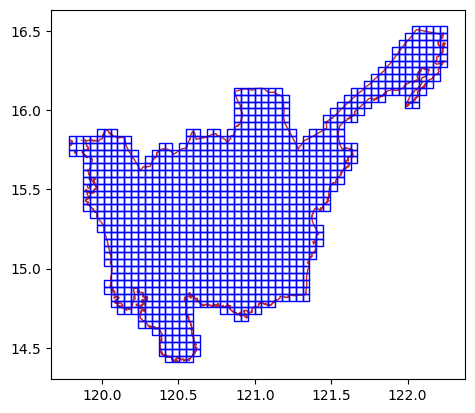

In [ ]:
#| no_test
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(), facecolor="none", edgecolor="#C62828"
)
ax = grid_aoi.plot(ax=ax, facecolor="none", edgecolor="blue")

In [ ]:
%%time
region3_pois = gpd.read_file("../data/region3_osm_pois.geojson")

CPU times: user 9.58 ms, sys: 740 µs, total: 10.3 ms
Wall time: 10.8 ms


In [ ]:
#| no_test
region3_pois.head()

,osm_id,code,fclass,name,BARANGAY_CODE,geometry
0,560410986,2701,tourist_info,Gawad Kalinga Office,031420009,POINT (121.08516 14.83601)
1,1244301672,2701,tourist_info,"N 15deg 26' 11.1"", E 120deg 25' 50.2"", El...",036918006,POINT (120.43045 15.43663)
2,1666684393,2701,tourist_info,Eco Park Tourist Information & DENR Environmen...,036918006,POINT (120.44958 15.46446)
3,1679992929,2701,tourist_info,La Paz Tarlac - Zaragoza Nueva Ecija Boundary,034932027,POINT (120.75832 15.44284)
4,1714645729,2701,tourist_info,Lucy Pineda,035409019,POINT (120.61452 15.23359)


In [ ]:
len(region3_pois)

701

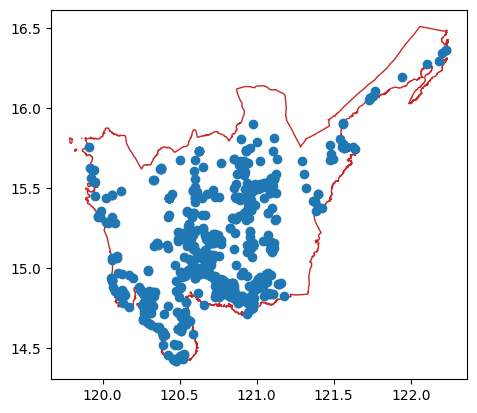

In [ ]:
#| no_test
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(), facecolor="none", edgecolor="#C62828"
)
ax = region3_pois.plot(ax=ax)

In [ ]:
#| include: false
assert len(region3_pois) == 701

In [ ]:
#| include: false
assert list(grid_aoi.columns.values) == ["x", "y", "geometry"]

In [ ]:
#| include: false
assert list(region3_pois.columns.values) == [
    "osm_id",
    "code",
    "fclass",
    "name",
    "BARANGAY_CODE",
    "geometry",
]

Compute pois count per grid

In [ ]:
%%time
grid_aoi = vzs.create_zonal_stats(
    grid_aoi,
    region3_pois,
    overlap_method="intersects",
    aggregations=[{"func": "count", "output": "pois_count"}],
)

CPU times: user 5.43 ms, sys: 647 µs, total: 6.08 ms
Wall time: 5.52 ms


In [ ]:
#| no_test
grid_aoi[grid_aoi.pois_count > 0].head()

,x,y,geometry,pois_count
11,2,28,"POLYGON ((119.87566 15.6222, 119.92058 15.6222...",1.0
14,2,31,"POLYGON ((119.87566 15.75193, 119.92058 15.751...",1.0
18,3,23,"POLYGON ((119.92058 15.40581, 119.9655 15.4058...",1.0
21,3,26,"POLYGON ((119.92058 15.53567, 119.9655 15.5356...",4.0
22,3,27,"POLYGON ((119.92058 15.57894, 119.9655 15.5789...",1.0


In [ ]:
#| no_test
grid_aoi.pois_count.sum()

np.float64(701.0)

In [ ]:
#| include: false
assert grid_aoi.pois_count.sum() == len(region3_pois)

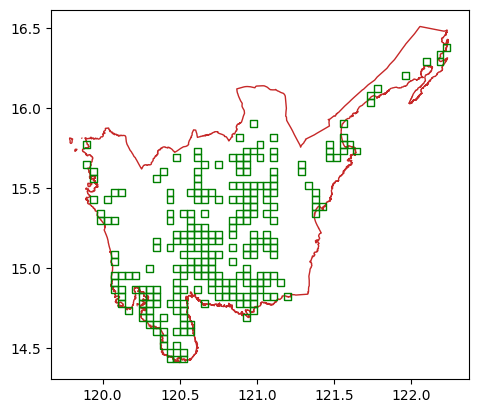

In [ ]:
#| no_test
# show grids with at least 1 poi
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(),
    facecolor="none",
    edgecolor=[
        "#C62828",
    ],
)
ax = grid_aoi[grid_aoi.pois_count > 0].plot(ax=ax, facecolor="none", edgecolor="green")

### Use case 2 - Stats on a metric column

#### Example 1 Regions over Population per Bgy Level

* Input:
  - aoi - region3,4,ncr geometry (geom_type - polygon, multipolygon)
  - data - region3,4, ncr population data (geom_type - pois) 
  - data_type: 'individual_pois'
  - overlap_method = 'intersects'
  - aggregations:
    * metric_columns: 'population','men', etc.
      - each row in the data has a column: population, men, women, etc. with numeric value
      - aggregation_functions - 'min','max', 'mean', 'sum',  etc.
      - output_columns - 'pop_min', 'pop_max', for each column
* Output:
  - aoi with new output columns pop_min, pop_max etc 

Load 2020 Region 3, Region 4, and NCR Population Data at Barangay level (Admin Level 4)

:::{.callout-note}

The population data came from the **2020 Facebook HRSL Dataset** filtered for barangays covering Regions 3, Region 4, and NCR and converted the geometries from polygons to points by computing their centroids (projected to `EPSG:3969`). The land area was computed by projecting to `EPSG:3123` and getting the `geometry.area` .

:::

In [ ]:
%%time
# load region3,4,ncr population data at barangay level
region34ncr_pop_data = gpd.read_file("../data/region34ncr_population_land.geojson")

CPU times: user 113 ms, sys: 2.56 ms, total: 115 ms
Wall time: 117 ms


In [ ]:
#| include: false
assert len(region34ncr_pop_data) == 8816

In [ ]:
#| no_test
region34ncr_pop_data.head()

,BARANGAY_CODE,population,men,women,children_under_five,youth_15_24,women_of_reproductive_age_15_49,elderly_60_plus,land_area,geometry
0,31420020.0,1807,920,887,202,359,468,77,2.183518e+05,POINT (121.05919 14.85825)
1,34915006.0,3093,1594,1499,352,658,826,159,7.327482e+06,POINT (120.9959 15.62242)
2,35403009.0,4241,2158,2083,474,821,1112,256,8.740450e+05,POINT (120.7773 15.1458)
3,35409023.0,3373,1750,1623,296,611,895,244,6.484611e+05,POINT (120.58052 15.22315)
4,35413009.0,20884,10539,10344,2198,3893,5589,1260,2.015571e+06,POINT (120.68523 15.09163)


In [ ]:
#| no_test
region34ncr_pop_data.columns.values

array(['BARANGAY_CODE', 'population', 'men', 'women',
       'children_under_five', 'youth_15_24',
       'women_of_reproductive_age_15_49', 'elderly_60_plus', 'land_area',
       'geometry'], dtype=object)

Compute zonal stats for regions 3,4,NCR
* barangay count per region (bgy_count)
* sum and mean for each population statistic (population, men, women, etc)
* sum, mean, std, min, max for land area statistic

In [ ]:
%%time
aoi = vzs.create_zonal_stats(
    aoi,
    region34ncr_pop_data,
    aggregations=[
        {"func": "count", "output": "bgy_count"},
        {
            "column": "population",
            "func": ["sum", "mean"],
            "output": ["pop_total", "pop_avg"],
        },
        {"column": "men", "func": ["sum", "mean"], "output": ["men_total", "men_avg"]},
        {
            "column": "women",
            "func": ["sum", "mean"],
            "output": ["women_total", "women_avg"],
        },
        {
            "column": "children_under_five",
            "func": ["sum", "mean"],
            "output": ["under5_total", "under5_avg"],
        },
        {
            "column": "youth_15_24",
            "func": ["sum", "mean"],
            "output": ["youth_total", "youth_avg"],
        },
        {
            "column": "women_of_reproductive_age_15_49",
            "func": ["sum", "mean"],
            "output": ["women_repro_total", "women_repro_avg"],
        },
        {
            "column": "elderly_60_plus",
            "func": ["sum", "mean"],
            "output": ["elderly_total", "elderly_avg"],
        },
        {
            "column": "land_area",
            "func": ["sum", "mean", "min", "max", "std"],
            "output": ["land_total", "land_avg", "land_min", "land_max", "land_std"],
        },
    ],
    overlap_method="intersects",
)

CPU times: user 61.4 ms, sys: 7.32 ms, total: 68.8 ms
Wall time: 68.5 ms


In [ ]:
#| no_test
aoi.columns.values

array(['Reg_Code', 'Reg_Name', 'Reg_Alt_Name', 'geometry', 'bgy_count',
       'pop_total', 'pop_avg', 'men_total', 'men_avg', 'women_total',
       'women_avg', 'under5_total', 'under5_avg', 'youth_total',
       'youth_avg', 'women_repro_total', 'women_repro_avg',
       'elderly_total', 'elderly_avg', 'land_total', 'land_avg',
       'land_min', 'land_max', 'land_std'], dtype=object)

In [ ]:
aoi.head()

,Reg_Code,Reg_Name,Reg_Alt_Name,geometry,bgy_count,pop_total,pop_avg,men_total,men_avg,women_total,...,youth_avg,women_repro_total,women_repro_avg,elderly_total,elderly_avg,land_total,land_avg,land_min,land_max,land_std
0,130000000,National Capital Region,NCR,"MULTIPOLYGON (((121.03842 14.78525, 121.03815 ...",1707,12484535,7313.728764,6132828,3592.752197,6350844,...,1468.077329,3699839,2167.451084,653306,382.721734,5.945955e+08,3.483277e+05,2890.947906,2.750653e+07,1.065422e+06
1,030000000,Region III,Central Luzon,"MULTIPOLYGON (((120.11687 14.76309, 120.11684 ...",3099,10581859,3414.604389,5353309,1727.431107,5227035,...,655.773475,2808810,906.360116,664150,214.311068,2.120885e+10,6.843771e+06,9589.467114,3.496501e+08,1.826504e+07
2,040000000,Region IV-A,Calabarzon,"MULTIPOLYGON (((122.72165 13.36485, 122.72143 ...",4010,14081857,3511.685037,7035334,1754.447382,7044548,...,671.226185,3857217,961.899501,780294,194.587032,1.551525e+10,3.869139e+06,3087.452331,4.310269e+08,1.119929e+07


#### Example 2 : Grids over Population per Bgy Level
* Input:
  - aoi - region3 grids geometry (geom_type - polygon)
  - data - population data (geom_type - pois) 
  - data_type: 'individual_pois'
  - overlap_method = 'intersects'
  - aggregations:
    * metric_columns: 'population','men', 'land_area'
      - each row in the data has a column population, men, women, including land with numeric value
      - aggregation_functions - 'min','max', 'mean', 'sum',  etc.
      - output_columns - 'pop_min', 'pop_max', for each 
* Output:
  - aoi with new columns pop_min, pop_max  etc.

Load population and land POIs (Bgy level)

:::{.callout-note}

The dataset is similar to the previous one (Region 3, Region 4, and NCR) except that it has been filtered only data for the Region 3.

:::

In [ ]:
%%time
region3_pop_pois = gpd.read_file("../data/region3_population_pois.geojson")

CPU times: user 45.2 ms, sys: 1.13 ms, total: 46.3 ms
Wall time: 46.9 ms


In [ ]:
#| no_test
region3_pop_pois.head()

,BARANGAY_CODE,population,men,women,children_under_five,youth_15_24,women_of_reproductive_age_15_49,elderly_60_plus,land_area,Reg_Name,geometry
0,31420020.0,1807,920,887,202,359,468,77,2.183518e+05,Region III,POINT (121.05919 14.85825)
1,34915006.0,3093,1594,1499,352,658,826,159,7.327482e+06,Region III,POINT (120.9959 15.62242)
2,35403009.0,4241,2158,2083,474,821,1112,256,8.740450e+05,Region III,POINT (120.7773 15.1458)
3,35409023.0,3373,1750,1623,296,611,895,244,6.484611e+05,Region III,POINT (120.58052 15.22315)
4,35413009.0,20884,10539,10344,2198,3893,5589,1260,2.015571e+06,Region III,POINT (120.68523 15.09163)


In [ ]:
#| no_test
region3_pop_pois.columns.values

array(['BARANGAY_CODE', 'population', 'men', 'women',
       'children_under_five', 'youth_15_24',
       'women_of_reproductive_age_15_49', 'elderly_60_plus', 'land_area',
       'Reg_Name', 'geometry'], dtype=object)

Create zonal stats (same as previous example, but now for a more granular level for region 3 only)

In [ ]:
%%time
grid_aoi = vzs.create_zonal_stats(
    grid_aoi,
    region3_pop_pois,
    aggregations=[
        {"func": "count", "output": "bgy_count"},
        {
            "column": "population",
            "func": ["sum", "mean"],
            "output": ["pop_total", "pop_avg"],
        },
        {"column": "men", "func": ["sum", "mean"], "output": ["men_total", "men_avg"]},
        {
            "column": "women",
            "func": ["sum", "mean"],
            "output": ["women_total", "women_avg"],
        },
        {
            "column": "children_under_five",
            "func": ["sum", "mean"],
            "output": ["under5_total", "under5_avg"],
        },
        {
            "column": "youth_15_24",
            "func": ["sum", "mean"],
            "output": ["youth_total", "youth_avg"],
        },
        {
            "column": "women_of_reproductive_age_15_49",
            "func": ["sum", "mean"],
            "output": ["women_repro_total", "women_repro_avg"],
        },
        {
            "column": "elderly_60_plus",
            "func": ["sum", "mean"],
            "output": ["elderly_total", "elderly_avg"],
        },
        {
            "column": "land_area",
            "func": ["sum", "mean", "min", "max", "std"],
            "output": ["land_total", "land_avg", "land_min", "land_max", "land_std"],
        },
    ],
    overlap_method="intersects",
)

CPU times: user 9.91 ms, sys: 764 µs, total: 10.7 ms
Wall time: 10.2 ms


In [ ]:
#| no_test
grid_aoi.head()

,x,y,geometry,pois_count,bgy_count,pop_total,pop_avg,men_total,men_avg,women_total,...,youth_avg,women_repro_total,women_repro_avg,elderly_total,elderly_avg,land_total,land_avg,land_min,land_max,land_std
0,0,30,"POLYGON ((119.78583 15.7087, 119.83075 15.7087...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,31,"POLYGON ((119.78583 15.75193, 119.83075 15.751...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,32,"POLYGON ((119.78583 15.79516, 119.83075 15.795...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,30,"POLYGON ((119.83075 15.7087, 119.87566 15.7087...",NaN,1.0,3415.0,3415.0,1744.0,1744.0,1670.0,...,648.0,848.0,848.0,229.0,229.0,5.552401e+06,5.552401e+06,5.552401e+06,5.552401e+06,NaN
4,1,32,"POLYGON ((119.83075 15.79516, 119.87566 15.795...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#| include: false
assert any(
    item
    in [
        "land_total",
        "land_avg",
        "land_min",
        "land_max",
        "land_std",
        "elderly_total",
        "elderly_avg",
        "women_repro_total",
        "women_repro_avg",
        "under5_total",
        "under5_avg",
        "women_total",
        "women_avg",
        "men_total",
        "men_avg",
        "pop_total",
        "pop_avg",
        "bgy_count",
    ]
    for item in list(grid_aoi.columns.values)
)

Show grids with bgy_count > 0 and bgy_count == 0

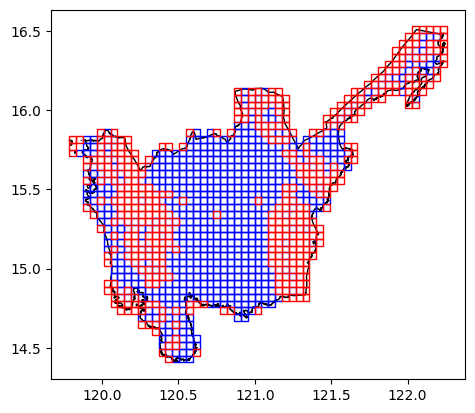

In [ ]:
#| no_test
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(), facecolor="none", edgecolor="black"
)
ax = grid_aoi[grid_aoi.bgy_count.notna()].plot(
    ax=ax, facecolor="none", edgecolor="blue"
)
ax = grid_aoi[grid_aoi.bgy_count.isna()].plot(ax=ax, facecolor="none", edgecolor="red")

## Generating Bing Tile Grid Zonal Stats

If our areas of interest use Bing Tile Grids (with the associated quadkeys), 

we can use a much faster way of generating zonal stats by pre-computing the quadkeys for our
data.

:::{.callout-note}

You can use the `geowrangler.grids` modules `BingTileGridGenerator` to convert your AOI into a Bing Tile Grid AOI.

:::


#### Example 1: Count POIs for Region 3 Bing Tile Grid AOI

* Input:
  - aoi bing tile grids zoom level 13 - region3 (Admin Level 1) (Central Luzon) geometry (geom_type - polygon, multipolygon)
  - data - Region 3 pois (geom_type - points)
  - aggregations:
    * count - number of pois within aoi
* Output
  - aoi with pois count (default output column: `index_count`)

Load our bing tile grid aoi 

In [ ]:
# load region3_admin area in bing tile grid ('ADM level 1 - Philippines, region 3, zoom level13')

region3_bingtile_grid = gpd.read_file("../data/region3_bingtile_grid13.geojson")

In [ ]:
#| no_test
region3_bingtile_grid.head()

,quadkey,geometry
0,1323030303301,"POLYGON ((120.10254 14.73239, 120.10254 14.774..."
1,1323030303300,"POLYGON ((120.05859 14.73239, 120.05859 14.774..."
2,1323030303311,"POLYGON ((120.19043 14.73239, 120.19043 14.774..."
3,1323030303133,"POLYGON ((120.19043 14.77488, 120.19043 14.817..."
4,1323030303131,"POLYGON ((120.19043 14.81737, 120.19043 14.859..."


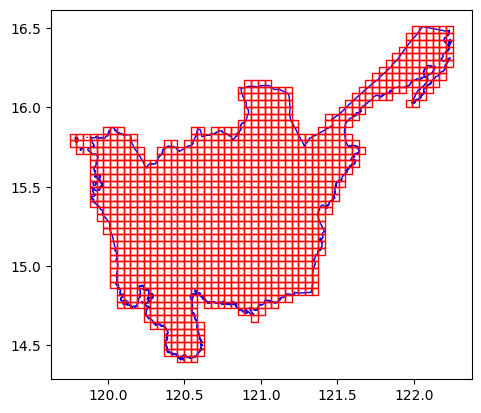

In [ ]:
#| no_test
ax = plt.axes()
ax = aoi[aoi.Reg_Name == "Region III"].plot(ax=ax, facecolor="none", edgecolor="blue")
ax = region3_bingtile_grid.plot(ax=ax, facecolor="none", edgecolor="red")

Lets compute the quadkeys for our Region3 pois

In [ ]:
DATA_ZOOM_LEVEL = 23  # for pois, it can be as high as 24

In [ ]:
%%time
region3_pois_quadkeys = vzs.compute_quadkey(region3_pois, DATA_ZOOM_LEVEL)

CPU times: user 19.7 ms, sys: 1.11 ms, total: 20.8 ms
Wall time: 20.6 ms


In [ ]:
region3_pois_quadkeys.head()

,osm_id,code,fclass,name,BARANGAY_CODE,geometry,quadkey
0,560410986,2701,tourist_info,Gawad Kalinga Office,031420009,POINT (121.08516 14.83601),13230312020312101332220
1,1244301672,2701,tourist_info,"N 15deg 26' 11.1"", E 120deg 25' 50.2"", El...",036918006,POINT (120.43045 15.43663),13230301323000331033200
2,1666684393,2701,tourist_info,Eco Park Tourist Information & DENR Environmen...,036918006,POINT (120.44958 15.46446),13230301321223132232132
3,1679992929,2701,tourist_info,La Paz Tarlac - Zaragoza Nueva Ecija Boundary,034932027,POINT (120.75832 15.44284),13230301332111310110220
4,1714645729,2701,tourist_info,Lucy Pineda,035409019,POINT (120.61452 15.23359),13230303110021032011230


Lets compute the zonal stats for each grid as the pois_count.
> Notice the computation time is pretty fast

In [ ]:
%%time
region3_bingtile_pois = vzs.create_bingtile_zonal_stats(
    region3_bingtile_grid,
    region3_pois_quadkeys,
    aggregations=[dict(func="count", output="pois_count", fillna=True)],
)

CPU times: user 6.35 ms, sys: 907 µs, total: 7.26 ms
Wall time: 6.5 ms


In [ ]:
#| no_test
region3_bingtile_pois[region3_bingtile_pois.pois_count > 0].head()

,quadkey,geometry,pois_count
5,1323030312020,"POLYGON ((120.23438 14.81737, 120.23438 14.859...",8.0
8,1323030121200,"POLYGON ((119.88281 15.74996, 119.88281 15.792...",1.0
11,1323030121222,"POLYGON ((119.88281 15.62304, 119.88281 15.665...",1.0
13,1323030123002,"POLYGON ((119.88281 15.53838, 119.88281 15.580...",1.0
22,1323030123001,"POLYGON ((119.92676 15.58071, 119.92676 15.623...",1.0


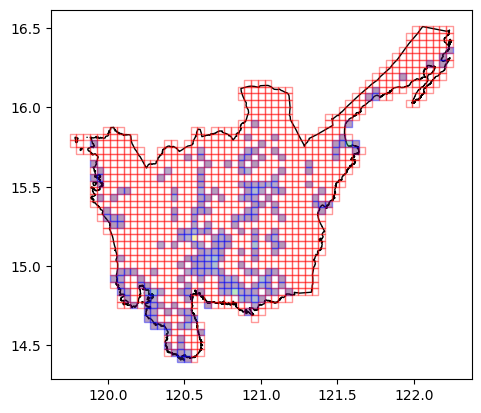

In [ ]:
#| no_test
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(), facecolor="none", edgecolor="black"
)
ax = region3_bingtile_pois[region3_bingtile_pois.pois_count > 0].plot(
    column="pois_count", ax=ax, edgecolor="blue", alpha=0.4
)
ax = region3_bingtile_pois[region3_bingtile_pois.pois_count == 0].plot(
    ax=ax, facecolor="none", edgecolor="red", alpha=0.4
)

#### Example 2: Population stats for Region 3 Bing Tile Grid AOI

* Input:
  - aoi bing tile grids zoom level 13 - region3 (Admin Level 1) (Central Luzon) geometry (geom_type - polygon, multipolygon)
  - data - Region 3 pop data (geom_type - points)
  - aggregations:
    * pop totals, avg, men total and avg, etc , barangay counts, etc.
* Output
  - aoi bing tile grids zoom level 13 with additional stats

We can also reuse the region34ncr population data to add more zonal statistics to our region3 bingtile pois

In [ ]:
%%time
# Add quadkeys to region34ncr population data
region34ncr_pop_data = vzs.compute_quadkey(
    region34ncr_pop_data, DATA_ZOOM_LEVEL
)  

CPU times: user 190 ms, sys: 1.17 ms, total: 191 ms
Wall time: 191 ms


In [ ]:
#| no_test
region34ncr_pop_data.head()

,BARANGAY_CODE,population,men,women,children_under_five,youth_15_24,women_of_reproductive_age_15_49,elderly_60_plus,land_area,geometry,quadkey
0,31420020.0,1807,920,887,202,359,468,77,2.183518e+05,POINT (121.05919 14.85825),13230312020301100210231
1,34915006.0,3093,1594,1499,352,658,826,159,7.327482e+06,POINT (120.9959 15.62242),13230310220010101012220
2,35403009.0,4241,2158,2083,474,821,1112,256,8.740450e+05,POINT (120.7773 15.1458),13230303111220301103213
3,35409023.0,3373,1750,1623,296,611,895,244,6.484611e+05,POINT (120.58052 15.22315),13230303101131332000021
4,35413009.0,20884,10539,10344,2198,3893,5589,1260,2.015571e+06,POINT (120.68523 15.09163),13230303112102100203003


In [ ]:
%%time
region3_bingtile_pois_pop_data = vzs.create_bingtile_zonal_stats(
    region3_bingtile_pois,  # reuse from previous example
    region34ncr_pop_data,  # updated with quadkeys
    aggregations=[
        {"func": "count", "output": "bgy_count"},
        {
            "column": "population",
            "func": ["sum", "mean"],
            "output": ["pop_total", "pop_avg"],
        },
        {"column": "men", "func": ["sum", "mean"], "output": ["men_total", "men_avg"]},
        {
            "column": "women",
            "func": ["sum", "mean"],
            "output": ["women_total", "women_avg"],
        },
        {
            "column": "children_under_five",
            "func": ["sum", "mean"],
            "output": ["under5_total", "under5_avg"],
        },
        {
            "column": "youth_15_24",
            "func": ["sum", "mean"],
            "output": ["youth_total", "youth_avg"],
        },
        {
            "column": "women_of_reproductive_age_15_49",
            "func": ["sum", "mean"],
            "output": ["women_repro_total", "women_repro_avg"],
        },
        {
            "column": "elderly_60_plus",
            "func": ["sum", "mean"],
            "output": ["elderly_total", "elderly_avg"],
        },
        {
            "column": "land_area",
            "func": ["sum", "mean", "min", "max", "std"],
            "output": ["land_total", "land_avg", "land_min", "land_max", "land_std"],
        },
    ],
)

CPU times: user 13.1 ms, sys: 1.14 ms, total: 14.2 ms
Wall time: 13.4 ms


In [ ]:
#| no_test
region3_bingtile_pois_pop_data[region3_bingtile_pois_pop_data.bgy_count.notna()].head()

,quadkey,geometry,pois_count,bgy_count,pop_total,pop_avg,men_total,men_avg,women_total,women_avg,...,youth_avg,women_repro_total,women_repro_avg,elderly_total,elderly_avg,land_total,land_avg,land_min,land_max,land_std
5,1323030312020,"POLYGON ((120.23438 14.81737, 120.23438 14.859...",8.0,5.0,40890.0,8178.000000,20398.0,4079.600000,20490.0,4098.000000,...,1662.000000,11493.0,2298.600000,2337.0,467.4,4.156777e+06,8.313554e+05,1.319242e+05,2.503691e+06,9.727404e+05
6,1323030120313,"POLYGON ((119.83887 15.70766, 119.83887 15.749...",0.0,1.0,3415.0,3415.000000,1744.0,1744.000000,1670.0,1670.000000,...,648.000000,848.0,848.000000,229.0,229.0,5.552401e+06,5.552401e+06,5.552401e+06,5.552401e+06,NaN
7,1323030121022,"POLYGON ((119.88281 15.79225, 119.88281 15.834...",0.0,1.0,4742.0,4742.000000,2438.0,2438.000000,2304.0,2304.000000,...,828.000000,1114.0,1114.000000,370.0,370.0,5.485826e+06,5.485826e+06,5.485826e+06,5.485826e+06,NaN
8,1323030121200,"POLYGON ((119.88281 15.74996, 119.88281 15.792...",1.0,7.0,21755.0,3107.857143,11047.0,1578.142857,10707.0,1529.571429,...,587.857143,5364.0,766.285714,1631.0,233.0,1.343751e+07,1.919645e+06,5.222719e+05,4.416378e+06,1.395113e+06
9,1323030121202,"POLYGON ((119.88281 15.70766, 119.88281 15.749...",0.0,5.0,10146.0,2029.200000,5257.0,1051.400000,4887.0,977.400000,...,376.600000,2393.0,478.600000,668.0,133.6,1.836666e+07,3.673332e+06,2.364678e+06,5.247429e+06,1.068957e+06


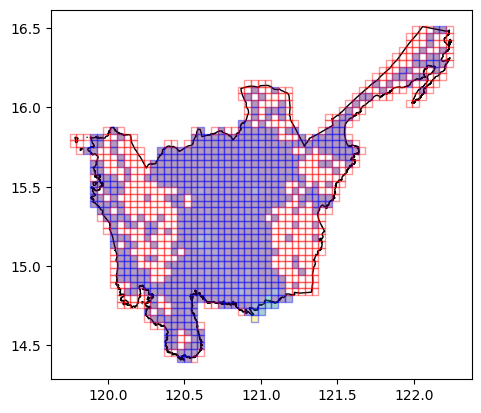

In [ ]:
#| no_test
ax = aoi[aoi.Reg_Name == "Region III"].plot(
    ax=plt.axes(), facecolor="none", edgecolor="black"
)
ax = region3_bingtile_pois_pop_data[
    region3_bingtile_pois_pop_data.bgy_count.notna()
].plot(column="pop_total", ax=ax, edgecolor="blue", alpha=0.4)
ax = region3_bingtile_pois_pop_data[
    region3_bingtile_pois_pop_data.bgy_count.isna()
].plot(ax=ax, facecolor="none", edgecolor="red", alpha=0.4)